Data Importing And Preparation

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
print("Listing Dataset Output Classes")
with open(".\dataset\\kddcup.names",'r') as f:
    Line1 = f.readlines()[0]
classes=Line1.split(',')
print("The number of classes :",len(classes))
print("-"*30)
print("normal = good connection")
print("other(22) = bad connection")

Listing Dataset Output Classes
The number of classes : 23
------------------------------
normal = good connection
other(22) = bad connection


In [3]:
with open(".\dataset\\kddcup.names",'r') as f:
    attributes = f.readlines()[1:]
for i in range(len(attributes)):
    attributes[i]=attributes[i][:-2]
    attributes[i]=attributes[i].removesuffix(': continuous')
    attributes[i]=attributes[i].removesuffix(': symbolic')
    attributes[i]=attributes[i].strip()
attributes.append("target")
print("The number of attributes :",len(attributes)+1)

The number of attributes : 43


There are originally 41 attributes in the dataset but we added extra 2 attributes for the target and the attack type

In [4]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

Reading Dataset

In [5]:
path = ".\\dataset\\kddcup.data_10_percent.gz"
df = pd.read_csv(path,names=attributes)

Adding Target and Attack Type Columns

In [6]:
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])
print("Dataframe Header Example")
df.head(1)

Dataframe Header Example


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [7]:
df.shape

(494021, 43)

Data Cleaning

In [8]:
print("checking for Null values")
print('The number of NULL values in the dataset is',len(df[df.isnull().any(1)]))

checking for Null values
The number of NULL values in the dataset is 0


In [9]:
print("checking for duplicate values")

df.drop_duplicates(subset=attributes, keep='first', inplace = True)
df.shape

checking for duplicate values


(145586, 43)

The new dataset consists of 145586 data point and 43 attribute

Data Analysis

In [10]:
print('Target Structure:')
df["target"].value_counts()

Target Structure:


normal.             87832
neptune.            51820
back.                 968
teardrop.             918
satan.                906
warezclient.          893
ipsweep.              651
smurf.                641
portsweep.            416
pod.                  206
nmap.                 158
guess_passwd.          53
buffer_overflow.       30
warezmaster.           20
land.                  19
imap.                  12
rootkit.               10
loadmodule.             9
ftp_write.              8
multihop.               7
phf.                    4
perl.                   3
spy.                    2
Name: target, dtype: int64

In [11]:
print("Attack Types: ")
df['Attack Type'].value_counts()

Attack Types: 


normal    87832
dos       54572
probe      2131
r2l         999
u2r          52
Name: Attack Type, dtype: int64

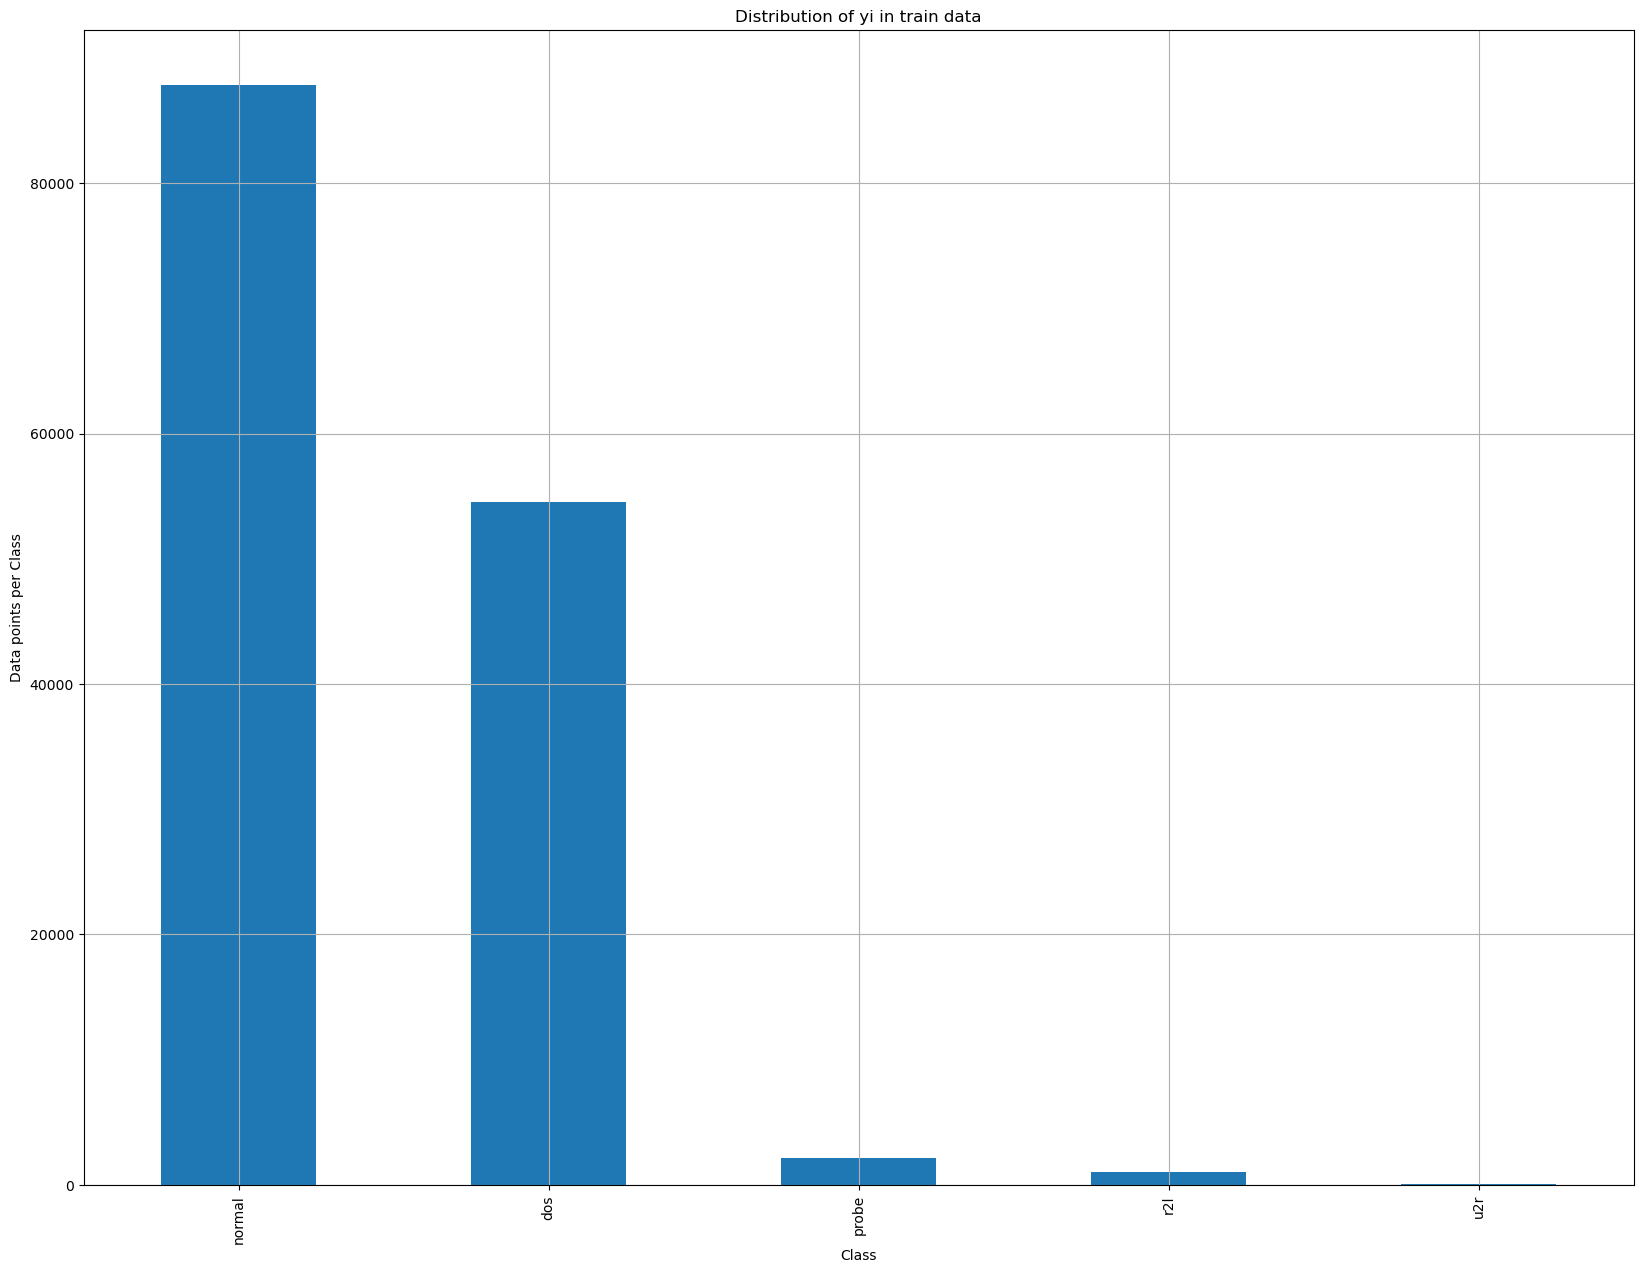

In [12]:
plt.figure(figsize=(20,15))
class_distribution = df['Attack Type'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

In [13]:
sorted_yi = np.argsort(-class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1,':', class_distribution.values[i], '(', np.round((class_distribution.values[i]/df.shape[0]*100), 3), '%)')

Number of data points in class 1 : 87832 ( 60.33 %)
Number of data points in class 2 : 54572 ( 37.484 %)
Number of data points in class 3 : 2131 ( 1.464 %)
Number of data points in class 4 : 999 ( 0.686 %)
Number of data points in class 5 : 52 ( 0.036 %)


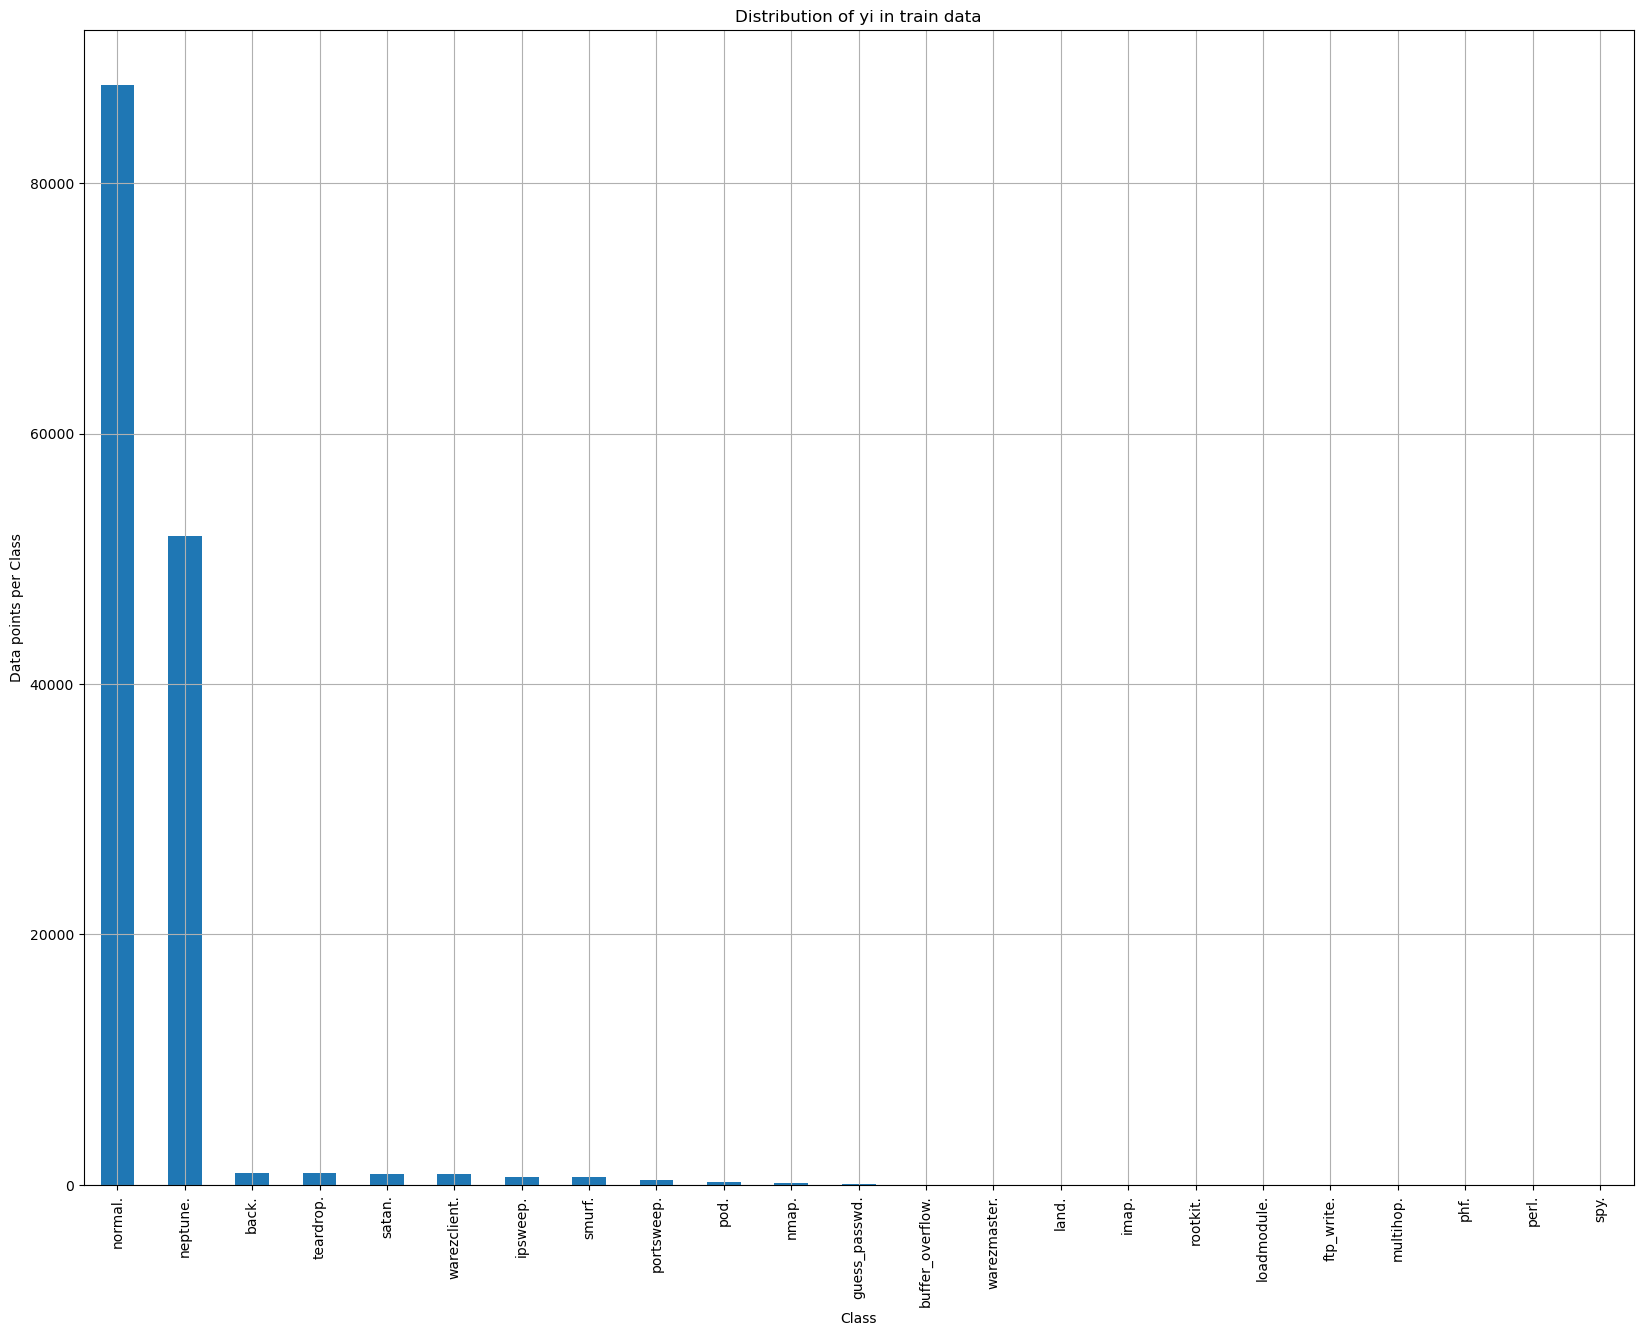

In [14]:
plt.figure(figsize=(20,15))
class_distribution = df['target'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

In [15]:
sorted_yi = np.argsort(-class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1,':', class_distribution.values[i], '(', np.round((class_distribution.values[i]/df.shape[0]*100), 3), '%)')

Number of data points in class 1 : 87832 ( 60.33 %)
Number of data points in class 2 : 51820 ( 35.594 %)
Number of data points in class 3 : 968 ( 0.665 %)
Number of data points in class 4 : 918 ( 0.631 %)
Number of data points in class 5 : 906 ( 0.622 %)
Number of data points in class 6 : 893 ( 0.613 %)
Number of data points in class 7 : 651 ( 0.447 %)
Number of data points in class 8 : 641 ( 0.44 %)
Number of data points in class 9 : 416 ( 0.286 %)
Number of data points in class 10 : 206 ( 0.141 %)
Number of data points in class 11 : 158 ( 0.109 %)
Number of data points in class 12 : 53 ( 0.036 %)
Number of data points in class 13 : 30 ( 0.021 %)
Number of data points in class 14 : 20 ( 0.014 %)
Number of data points in class 15 : 19 ( 0.013 %)
Number of data points in class 16 : 12 ( 0.008 %)
Number of data points in class 17 : 10 ( 0.007 %)
Number of data points in class 18 : 9 ( 0.006 %)
Number of data points in class 19 : 8 ( 0.005 %)
Number of data points in class 20 : 7 ( 0.005 

Data Correlation

Due to their linear dependence, two highly correlated variables can have nearly the same ability 
to predict the outcome value for an observation. 
Removing one of the correlated variables before training the model benefits the learning process 
and can result in a similar performance to the full model.

C:\Users\AKI\AppData\Local\Temp\ipykernel_28992\4162482413.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')# drop columns with NaN


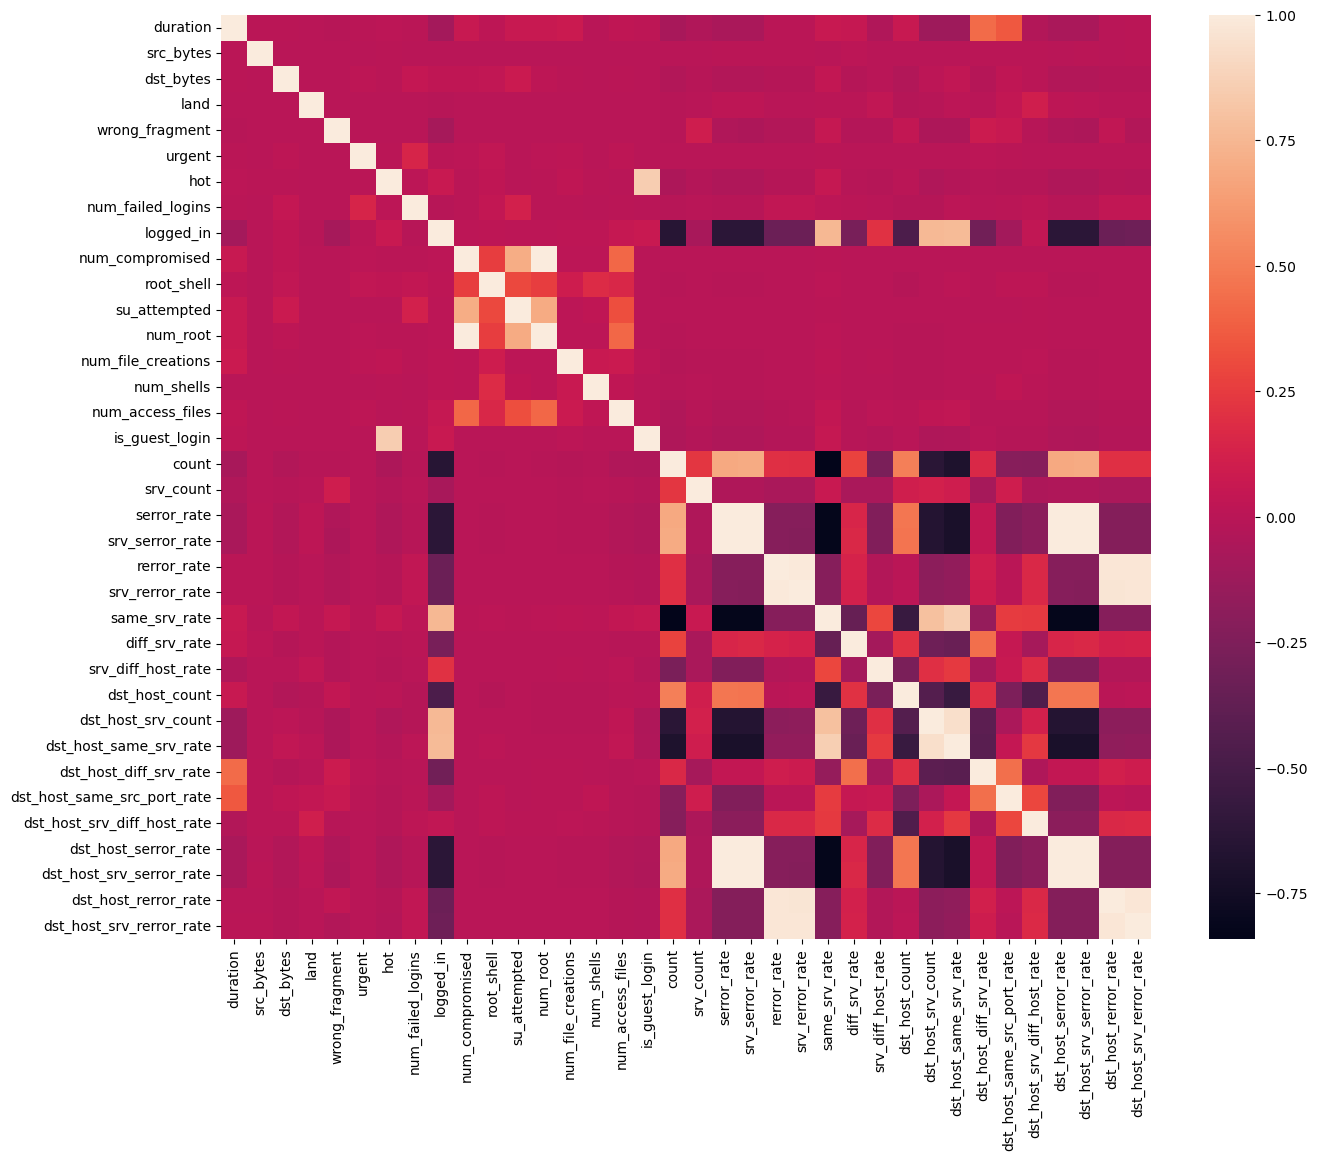

In [16]:
df = df.dropna('columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables.

The darker/whiter the square the stronger the relationship between the variables Thus highly correlated variables.

In [17]:
df['num_root'].corr(df['num_compromised'])

0.9942146069064147

In [18]:
df['srv_serror_rate'].corr(df['serror_rate'])

0.9963627548287103

In [19]:
df['srv_rerror_rate'].corr(df['rerror_rate'])

0.9913169525713

In [20]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])

0.9958977350060629

In [21]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])

0.9715011333749466

In [22]:
df['dst_host_serror_rate'].corr(df['serror_rate'])

0.9968427313716586

In [23]:
df['dst_host_serror_rate'].corr(df['srv_serror_rate'])

0.9951224321913452

In [24]:
df['dst_host_srv_serror_rate'].corr(df['serror_rate'])

0.9951521034735614

In [25]:
df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate'])

0.9983509795964999

In [26]:
df['dst_host_rerror_rate'].corr(df['rerror_rate'])

0.9755139232818189

In [27]:
df['dst_host_rerror_rate'].corr(df['srv_rerror_rate'])

0.9673749564724577

In [28]:
df['dst_host_srv_rerror_rate'].corr(df['rerror_rate'])

0.9726142096064013

In [29]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])

0.9751047687986008

These variables above are highly correlated and qualifies for dropping(> 0.95)

Dropping Variables

In [30]:
df.drop('num_root',axis = 1,inplace = True)

In [31]:
df.drop('srv_serror_rate',axis = 1,inplace = True)

In [32]:
df.drop('srv_rerror_rate',axis = 1, inplace=True)

In [33]:
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

In [34]:
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

In [35]:
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

In [36]:
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

In [37]:
print('Dataset propreties after Dropping')
df.head()
df.shape

Dataset propreties after Dropping


(145586, 34)

Preprocessing Features

*Categorical Features

In [38]:
num_cols = df._get_numeric_data().columns
categorical_cols = list(set(df.columns)-set(num_cols))
categorical_cols.remove('Attack Type')
categorical_cols

['flag', 'protocol_type', 'service', 'target']

Our dataset has 3 categorical features namely protocol, service & flag which we will vectorize 
using feature mapping

In [39]:
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [40]:
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [41]:
smap = {'shell':0, 'pop_2':1, 'vmnet':3, 'link':4, 'tim_i':5, 'gopher':6, 'http_443':7, 'other':8, 'printer':9,
'hostnames':10, 'tftp_u':11, 'daytime':12, 'uucp':13, 'urp_i':14, 'login':15, 'domain_u':16, 'discard':17, 'mtp':18, 'telnet':19, 
'IRC':20, 'bgp':21, 'Z39_50':22, 'http':23, 'sunrpc':24, 'netstat':25, 'rje':26, 'ecr_i':27, 'iso_tsap':28, 'X11':29, 
'domain':30, 'csnet_ns':31, 'whois':32, 'time':33, 'klogin':34, 'systat':35, 'pm_dump':36, 'nntp':37, 'urh_i':38, 'imap4':39, 
'name':40, 'finger':41, 'netbios_ns':42, 'ftp':43, 'ntp_u':44, 'uucp_path':45, 'sql_net':46, 'kshell':47, 'auth':48, 'ftp_data':49, 
'eco_i':50, 'private':51, 'ldap':52, 'ssh':53, 'pop_3':54, 'supdup':55, 'nnsp':56, 'courier':57, 'smtp':58, 'echo':59, 
'red_i':60, 'ctf':61, 'efs':62, 'netbios_dgm':63, 'remote_job':64, 'exec':65, 'netbios_ssn':67}
df['service'] = df['service'].map(smap)

In [42]:
df.head()
df.dtypes

duration                         int64
protocol_type                    int64
service                          int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate       

Modelling

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [44]:
from sklearn.model_selection import train_test_split
df = df.drop(['target',], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Attack Type', axis=1), df['Attack Type'], stratify=df['Attack Type'], test_size=0.25)
print('Train data')
print(X_train.shape)
print(Y_train.shape)
print('='*20)
print('Test data')
print(X_test.shape)
print(Y_test.shape)

Train data
(109189, 32)
(109189,)
Test data
(36397, 32)
(36397,)


GAUSSIAN NAIVE BAYES

In [45]:
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()

In [46]:
start_time = time.time()
model1.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  0.21300792694091797


In [47]:
start_time = time.time()
Y_test_pred1 = model1.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  0.10900044441223145


In [48]:
print("Train score is:", model1.score(X_train, Y_train))
print("Test score is:",model1.score(X_test,Y_test))

Train score is: 0.6658179853281924
Test score is: 0.6663736022199632


DECISION TREE

In [49]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [50]:
start_time = time.time()
model2.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  0.33699798583984375


In [51]:
start_time = time.time()
Y_test_pred2 = model2.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  0.013000249862670898


In [52]:
print("Train score is:", model2.score(X_train, Y_train))
print("Test score is:",model2.score(X_test,Y_test))

Train score is: 0.9840826456877524
Test score is: 0.9845866417561887


RANDOM FOREST

In [53]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=30)

In [54]:
start_time = time.time()
model3.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  2.4314911365509033


In [55]:
start_time = time.time()
Y_test_pred3 = model3.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  0.12003469467163086


In [61]:
print("Train score is:", model3.score(X_train, Y_train))
print("Test score is:",model3.score(X_test,Y_test))

Train score is: 0.9999908415682899
Test score is: 0.999450504162431


ADABOOST

In [58]:
from sklearn.ensemble import AdaBoostClassifier
model4 = AdaBoostClassifier(n_estimators=50, learning_rate=1)

In [59]:
start_time = time.time()
model4.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  10.014644861221313


In [60]:
start_time = time.time()
Y_test_pred4 = model4.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  0.49602317810058594


In [62]:
print("Train score is:", model4.score(X_train, Y_train))
print("Test score is:",model4.score(X_test,Y_test))

Train score is: 0.6139904202804312
Test score is: 0.6147484682803528


Since feature scalling is out of the scope of this application, Algorithms like SVM, KNN, Neural Networks, 
Linear Regression and Logistic Regression will not be used.

Result Analysis

Training Accuracy

<BarContainer object of 4 artists>

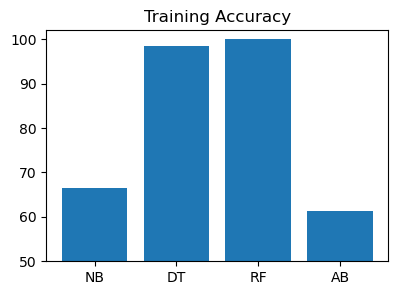

In [75]:
names = ['NB','DT','RF','AB']
values = [66.581,98.408,99.999,61.399]
f = plt.figure(figsize=(15,3),num=10)
f = plt.subplot(131)
f.set_title("Training Accuracy")
plt.ylim(50,102)
plt.bar(names,values)

Testing Accuracy

<BarContainer object of 4 artists>

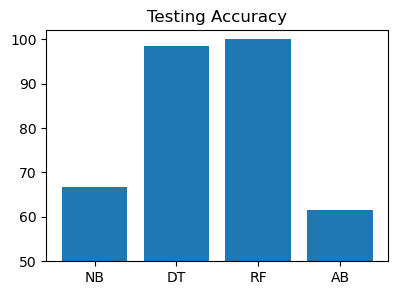

In [80]:
names = ['NB','DT','RF','AB']
values = [66.637,98.458,99.945,61.474]
f = plt.figure(figsize=(15,3),num=10)
f = plt.subplot(131)
f.set_title("Testing Accuracy")
plt.ylim(50,102)
plt.bar(names,values)

Training Time

<BarContainer object of 4 artists>

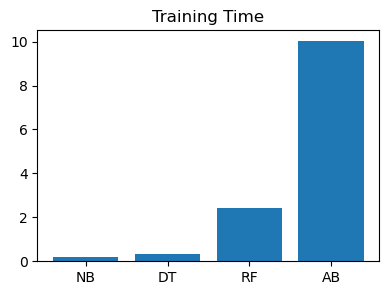

In [74]:
names = ['NB','DT','RF','AB']
values = [0.21300,0.33699,2.43149,10.0146]
f = plt.figure(figsize=(15,3),num=10)
f = plt.subplot(131)
f.set_title("Training Time")
plt.bar(names,values)

Testing Time

<BarContainer object of 4 artists>

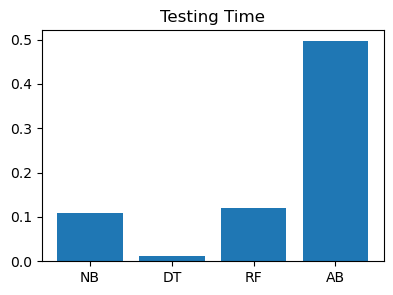

In [72]:
names = ['NB','DT','RF','AB']
values = [0.10900,0.01300,0.12003,0.49602]
f = plt.figure(figsize=(15,3),num=10)
f = plt.subplot(131)
f.set_title("Testing Time")
plt.bar(names,values)

Conclusion

All the models have very close performance scores on train and test data, thus they are not OVERFITTING.

The Decision Tree model is our best model for this demonstration of intrusion detection application as it has the 
highest Training/Testing Score to Training/Testing Time ratio.